In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("/kaggle/input/dataset/train.csv")
X = df["text"]
y = df["labels"]

In [12]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words="english")
X_tfidf = tfidf.fit_transform(X)


In [14]:
import numpy as np  

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
fold_idx = 1

for train_index, test_index in skf.split(X_tfidf, y):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearSVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"\n==== Fold {fold_idx} ====")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=["No Effect", "Side Effect"]))
    fold_idx += 1


mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print("\n==== Overall 5-Fold Cross-Validation Results ====")
print(f"Per-fold Accuracies: {[f'{a:.4f}' for a in accuracies]}")
print(f"Mean Accuracy: {mean_acc:.4f}")
print(f"Standard Deviation: {std_acc:.4f}")



==== Fold 1 ====
Accuracy: 0.9208
              precision    recall  f1-score   support

   No Effect       0.93      0.92      0.93       275
 Side Effect       0.91      0.92      0.91       230

    accuracy                           0.92       505
   macro avg       0.92      0.92      0.92       505
weighted avg       0.92      0.92      0.92       505


==== Fold 2 ====
Accuracy: 0.9266
              precision    recall  f1-score   support

   No Effect       0.91      0.96      0.93       274
 Side Effect       0.95      0.89      0.92       230

    accuracy                           0.93       504
   macro avg       0.93      0.92      0.93       504
weighted avg       0.93      0.93      0.93       504


==== Fold 3 ====
Accuracy: 0.9187
              precision    recall  f1-score   support

   No Effect       0.93      0.92      0.92       274
 Side Effect       0.90      0.92      0.91       230

    accuracy                           0.92       504
   macro avg       0.92

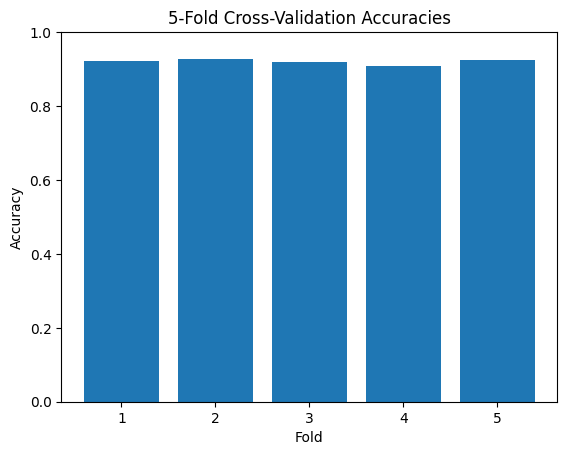

In [15]:
plt.bar(range(1, 6), accuracies)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Accuracies')
plt.ylim(0, 1)
plt.show()
